In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
# 解决汉字乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['text.color'] = 'black'  # 修改绘图文字颜色
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelcolor'] = 'black'  # 修改坐标轴文字颜色
plt.style.use('ggplot')
# 查看所有的绘图风格
#plt.style.available

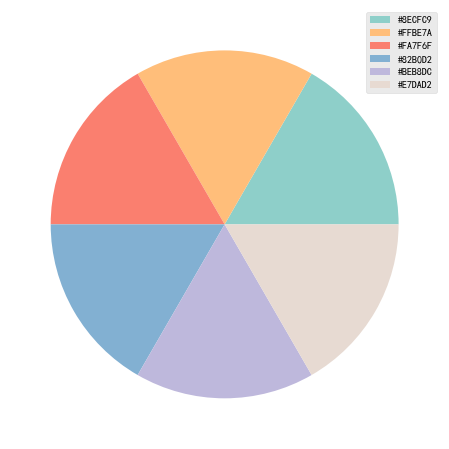

In [2]:
colors = ['#8ECFC9', '#FFBE7A', '#FA7F6F',
          '#82B0D2', '#BEB8DC', '#E7DAD2']  # 一个不错的学术配色方案
fig=plt.figure(figsize=(18,8))
plt.pie([1]*len(colors)
        ,colors=colors
        )
plt.legend(colors)
plt.show()

In [3]:
data=pd.read_excel('./datasets/历年地区生产总值.xlsx')
data.info()  # 查看导入数据是否存在异常


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   年份             20 non-null     int64  
 1   地区生产总值（单位:亿元）  20 non-null     float64
 2   第一产业           20 non-null     float64
 3   第二产业           20 non-null     float64
 4   第三产业           20 non-null     float64
 5   人均生产总值         20 non-null     float64
 6   人 均 生产总值 （美元）  20 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.2 KB


# 折线图

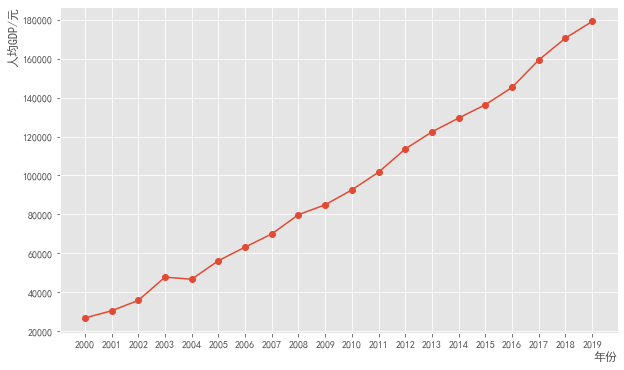

In [15]:
x = np.arange(data['年份'].shape[0])
x_tick = data['年份']
y = data['人均生产总值']
plt.figure(figsize=(10, 6))
l1=plt.plot(x, y, 'o-')#, color=colors[0])
plt.title('')
plt.xticks(x, x_tick, rotation=0)
# plt.legend()
# 添加轴标签
plt.xlabel('年份', loc='right')
plt.ylabel('人均GDP/元', loc='top')
#plt.savefig("./plt样图/average.png", transparent=True,
#dpi=300, bbox_inches='tight')
plt.savefig("./plt样图/折线图.png", facecolor='w')
plt.show()


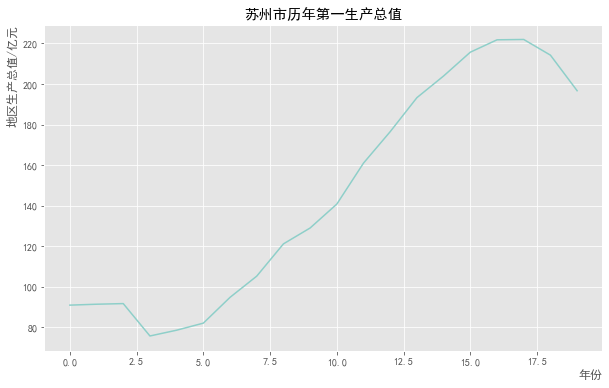

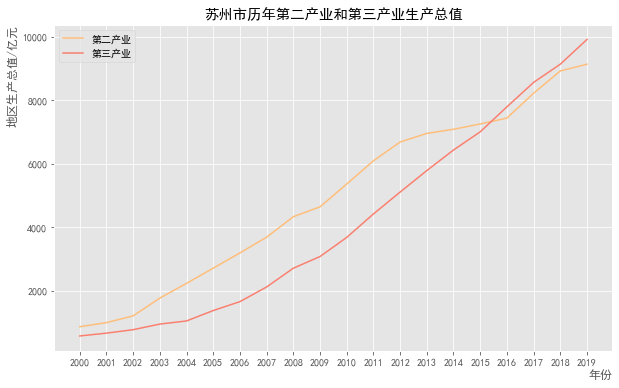

In [5]:
x = np.arange(data['年份'].shape[0])
x_tick = data['年份']
fig=plt.figure(figsize=(10, 6))
fig.patch.set_alpha(0)
l1, = plt.plot(x, data['第一产业'], color=colors[0])
plt.title('苏州市历年第一生产总值')
plt.xlabel('年份', loc='right')
plt.ylabel('地区生产总值/亿元', loc='top')
plt.savefig("./plt样图/第一产业.png", transparent=True,
dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(10, 6))
l2, = plt.plot(x, data['第二产业'], color=colors[1])
l3, = plt.plot(x, data['第三产业'], color=colors[2])
plt.legend([l2,l3],['第二产业','第三产业'])
plt.title('苏州市历年第二产业和第三产业生产总值')
plt.xticks(x, x_tick, rotation=0)
# plt.legend()
# 添加轴标签
# plt绘图背景为透明色
plt.xlabel('年份', loc='right')
plt.ylabel('地区生产总值/亿元', loc='top')
plt.savefig("./plt样图/第二三产业.png", transparent=True,
dpi=300, bbox_inches='tight')
#plt.savefig("./plt样图/GDP.png", facecolor='w')
plt.show()


# 条形图


In [6]:
x = np.arange(data['年份'].shape[0])
x_tick = data['年份']
y = data['人均生产总值']

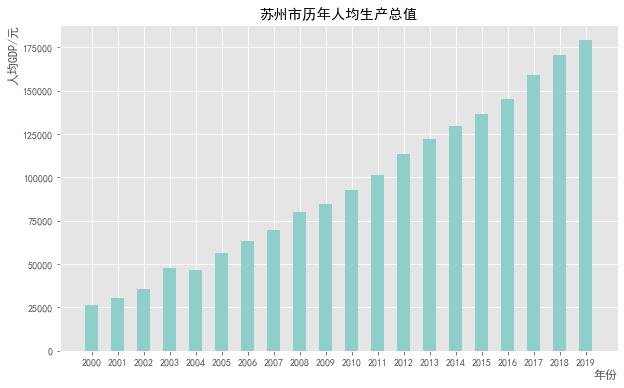

In [7]:
# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(x, y, color=colors[0], width=0.5)
plt.title('苏州市历年人均生产总值')
plt.xticks(x, x_tick, rotation=0)
# plt.legend()
# 添加轴标签
plt.xlabel('年份', loc='right')
plt.ylabel('人均GDP/元', loc='top')
#plt.savefig("./plt样图/average.png", transparent=True,
            #dpi=300, bbox_inches='tight')
plt.savefig("./plt样图/条形图.png", facecolor='w')
plt.show()

## 横向条形图

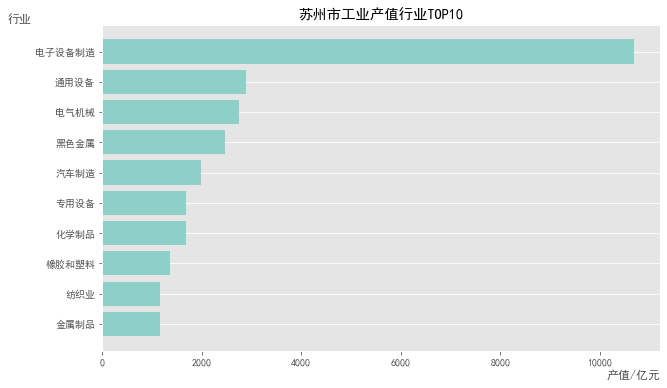

In [8]:
x_tick=['电子设备制造','通用设备','电气机械','黑色金属',
        '汽车制造','专用设备','化学制品','橡胶和塑料','纺织业','金属制品']
x_tick.reverse()
x = np.arange(len(x_tick))
y = [10674,2891,2747,2462,1993,1688,1684,1362,1170,1168]
y.reverse()
# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.barh(x, y, color=colors[0])
plt.title('苏州市工业产值行业TOP10')
plt.yticks(x, x_tick)
# plt.legend()
# 添加轴标签
plt.xlabel('产值/亿元', loc='right')
plt.grid(axis='x')
plt.ylabel('行业', loc='top',rotation=0)
plt.savefig("./plt样图/横向条形图.png", transparent=True,
        dpi=300, bbox_inches='tight')
#plt.savefig("./plt样图/产值.png", facecolor='w')
plt.show()


# 饼图


In [9]:
x_data = data.iloc[-1, 2:5].tolist()
explode = []
x_tick = data.iloc[-1, 0]
labels = data.columns[2:5].tolist()

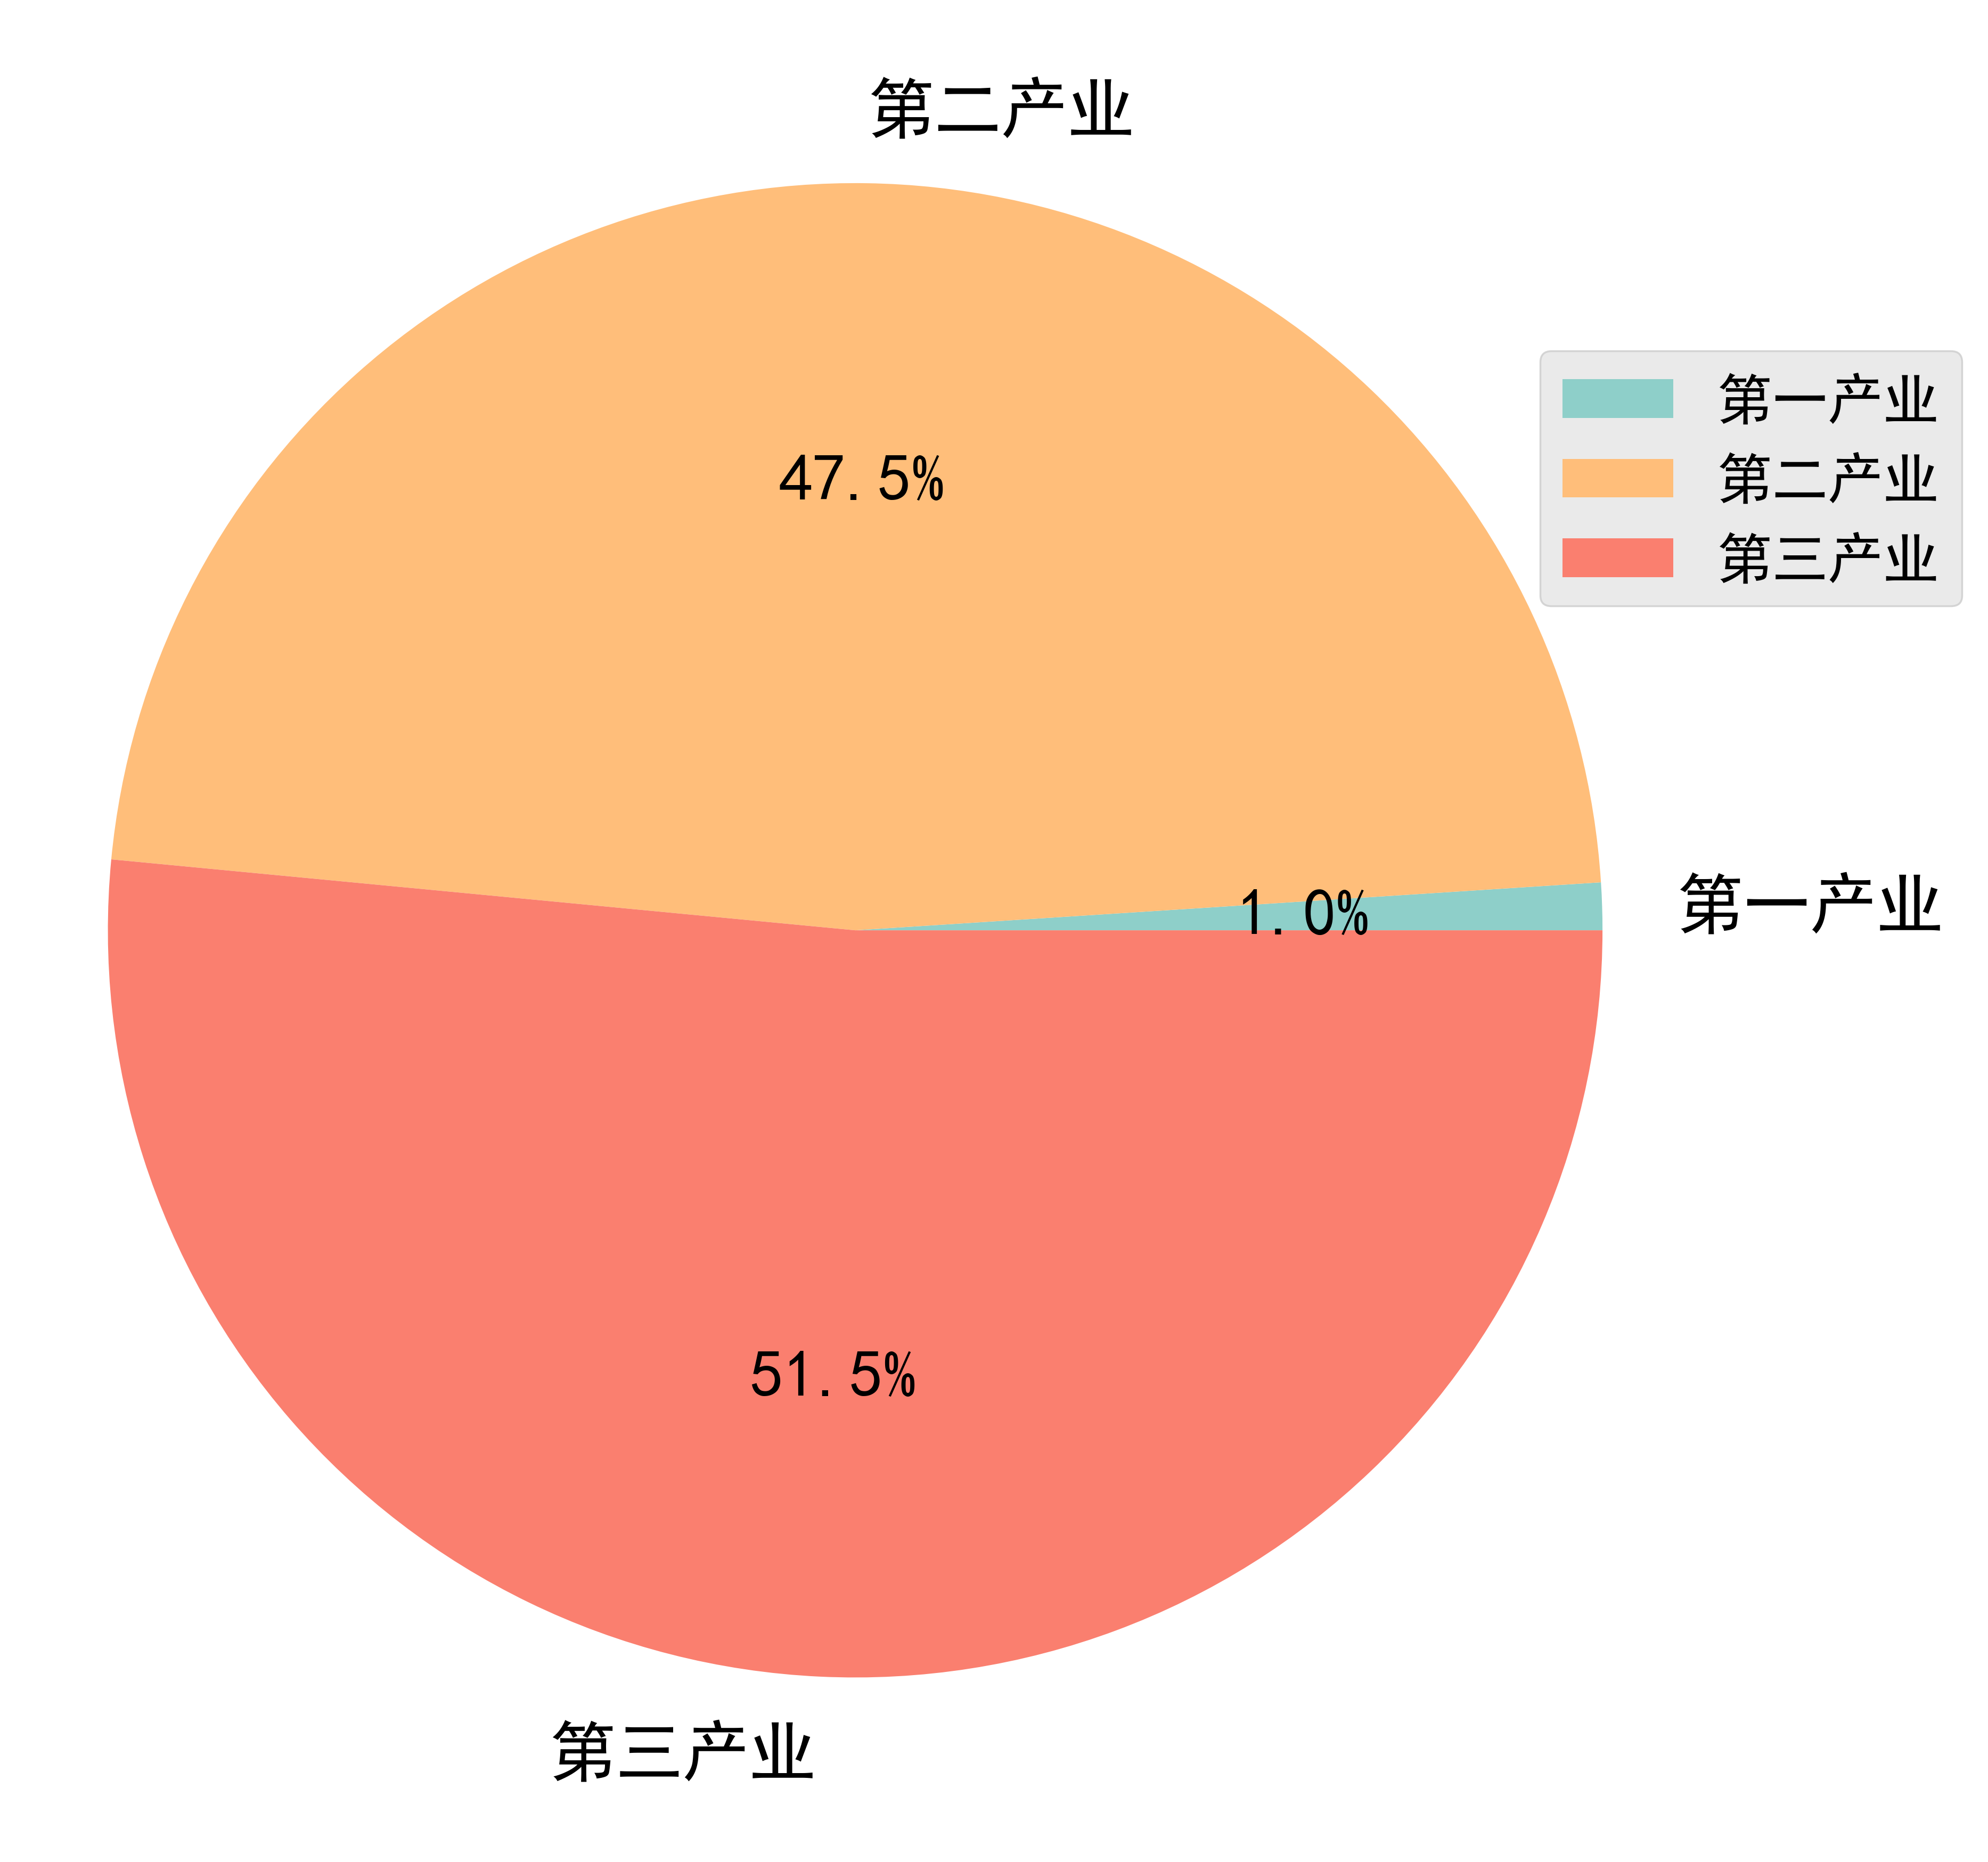

In [10]:
plt.figure(figsize=(8, 9), dpi=500)
patches, l_text, p_text = plt.pie(x_data,
                                  labels=labels,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  shadow=False,  # 设置阴影设置
                                  startangle=0
                                  )
plt.legend(patches, labels,
           loc="center left",
           bbox_to_anchor=(0.9, 0.25, 1, 1),
           fontsize=15)
for t in l_text: #设置文本大小
    t.set_size(18)
for t in p_text: # 设置百分比的文字大小
    t.set_size(18)
plt.axis('equal')
# plt.savefig("铅钡玻璃颜色饼状图.png")
plt.show()


<Figure size 4000x4500 with 0 Axes>

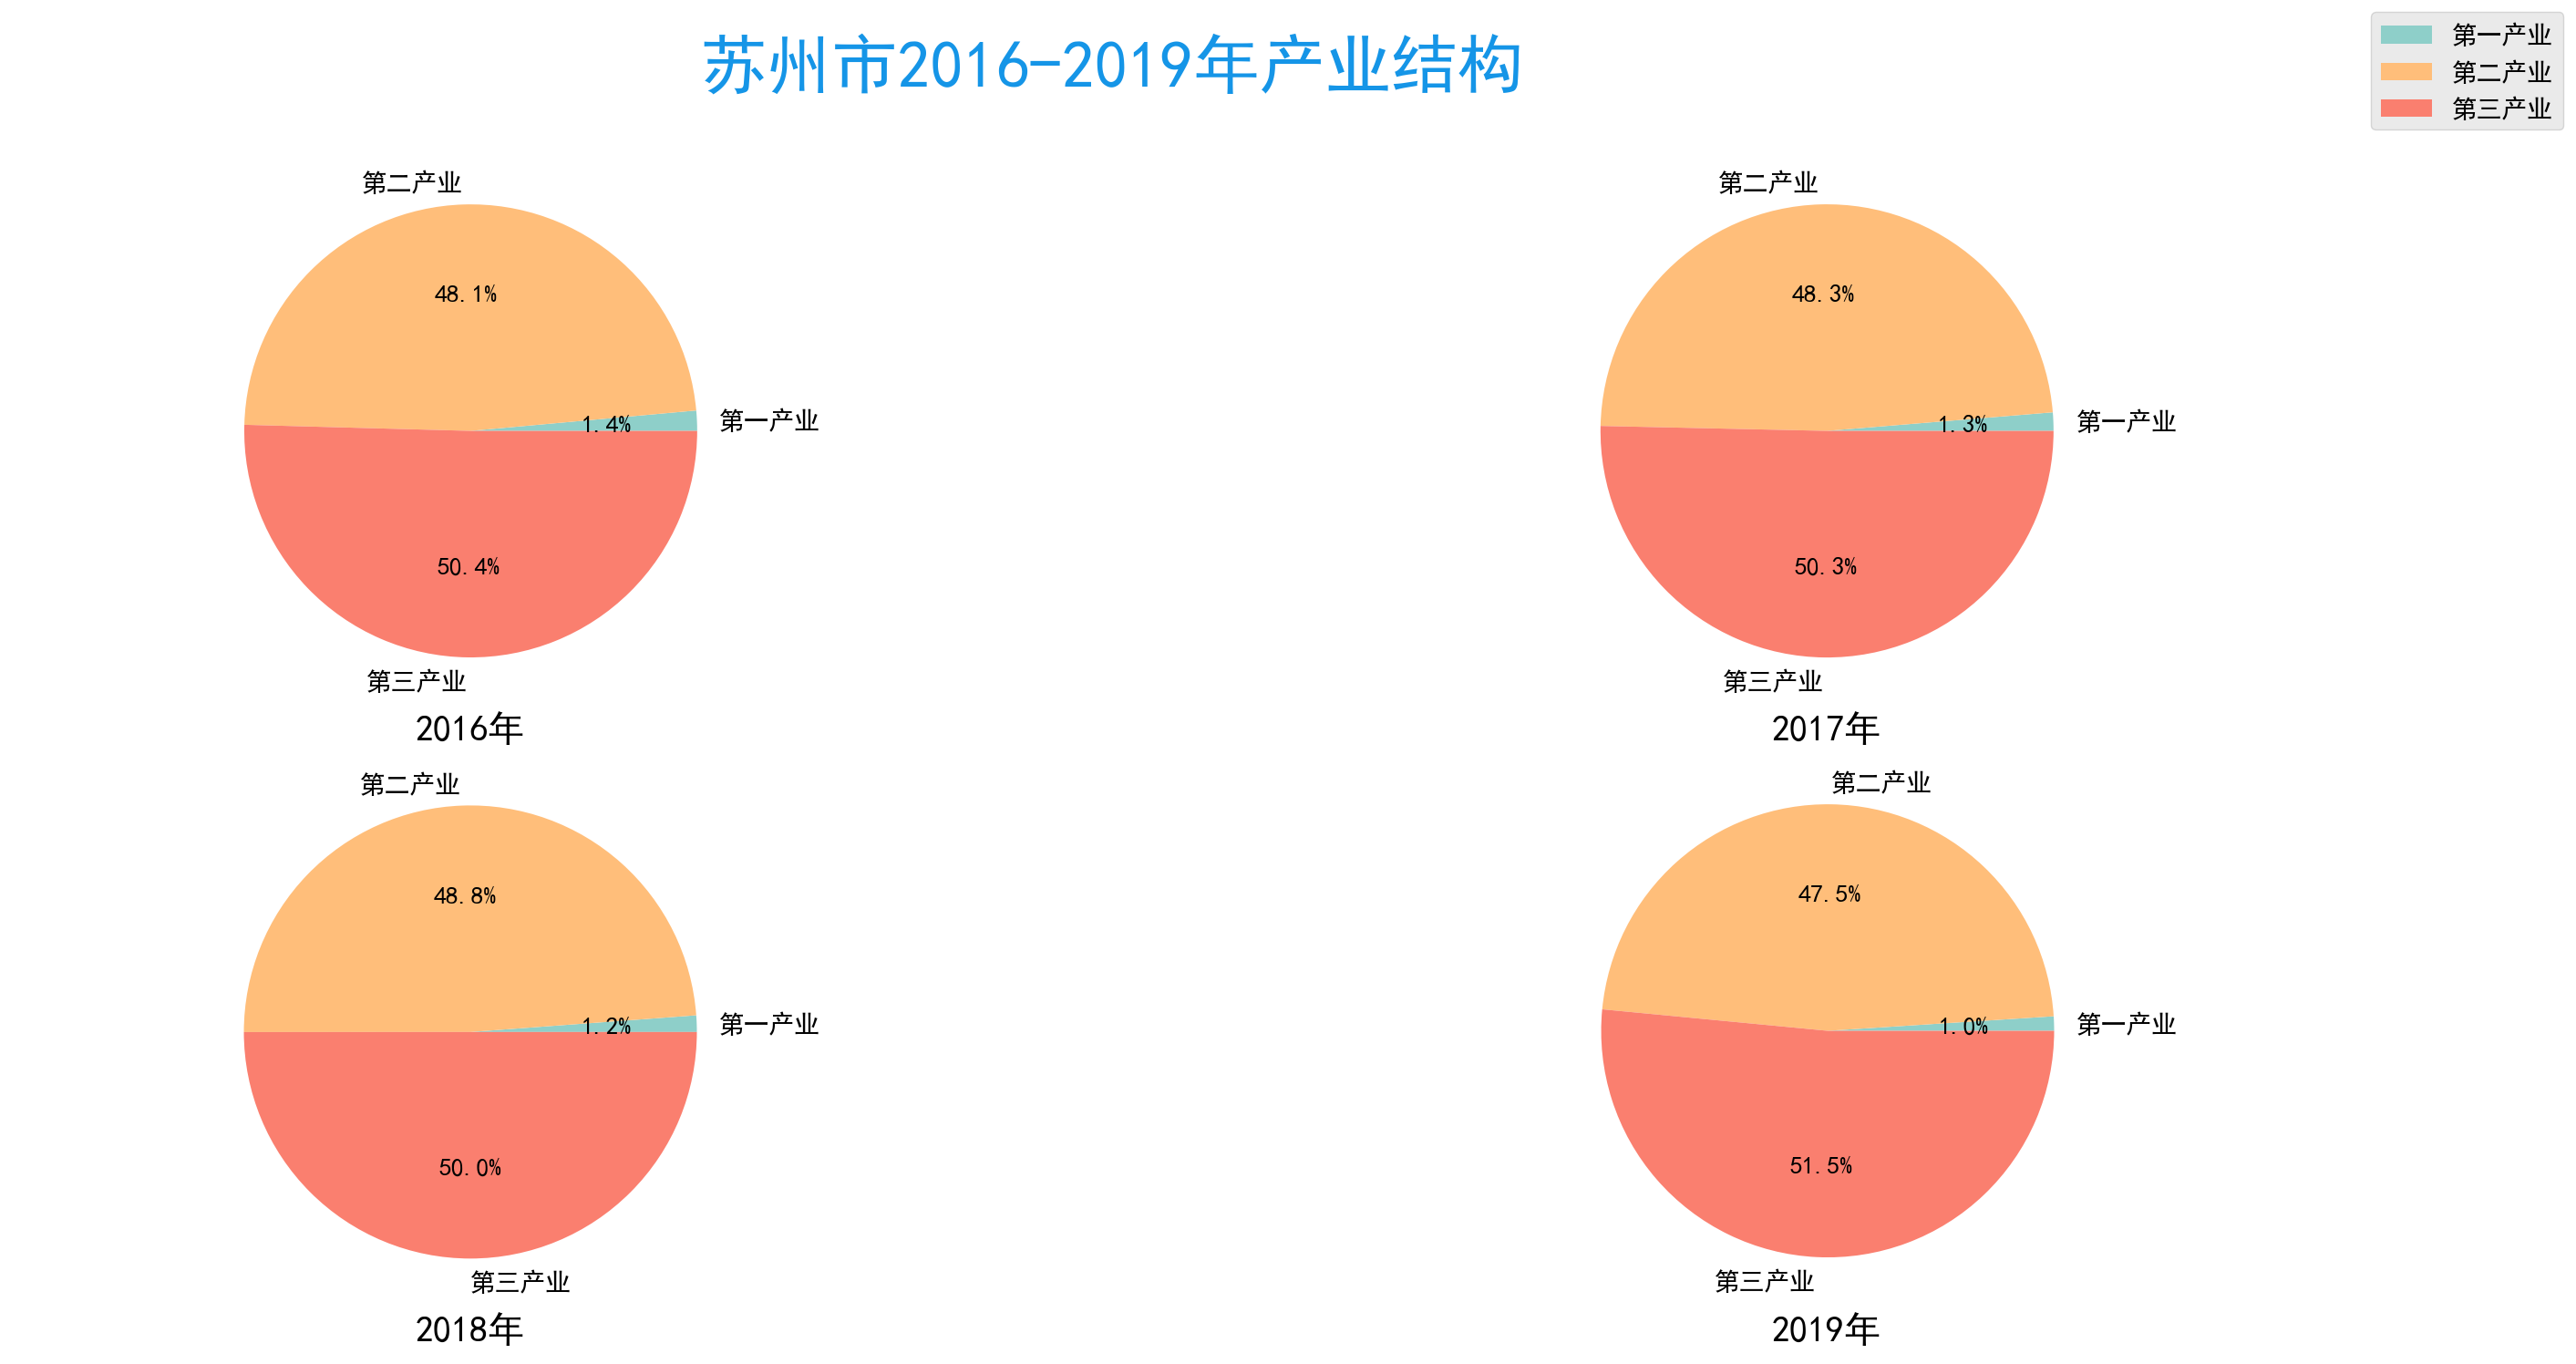

In [11]:
plt.figure(figsize=(8, 9), dpi=500)
fig, axj = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), dpi=200)
axes = axj.flatten()  # 子图展平
i = -4
explode = []

for ax in axes:
    x_data = data.iloc[i, 2:5].tolist()
    x_tick = data.iloc[i, 0]
    labels = data.columns[2:5].tolist()
    labels = data.columns[2:5].tolist()
    patches, l_text, p_text = ax.pie(x_data,
                                      colors=colors,
                                      labels=labels,
                                      autopct='%1.1f%%',
                                      shadow=False,  # 设置阴影设置
                                      startangle=0
                                      )
    # for t in l_text:  # 设置文本大小
    #     t.set_size(0)
    #for t in p_text:  # 设置百分比的文字大小
        #t.set_size()
    ax.axis('equal')
    ax.set_title(f"{data.iloc[i,0]}年",y=-0.15)#设置文字标题在下边显示
    plt.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=0.5, hspace=0.2)  # 调整子图间距
    i = i+1
patches, labels = fig.axes[-1].get_legend_handles_labels()
# 图例的位置，bbox_to_anchor=(0.5, 0.92),
labels = data.columns[2:5].tolist()
fig.legend(patches, labels, loc='upper right')
# 添加标题
fig.suptitle('苏州市2016-2019年产业结构', fontsize=26, color='#1595E7')
plt.savefig('./plt样图/多子图饼图.png')
plt.show()


# 多子图的格式调整
对于多子图的绘制，每一张子图的调整还和原来一直，与单图的绘制相比多子图时应该注意子图的布局以及多张子图公用元素的一些调整

<Figure size 4000x4500 with 0 Axes>

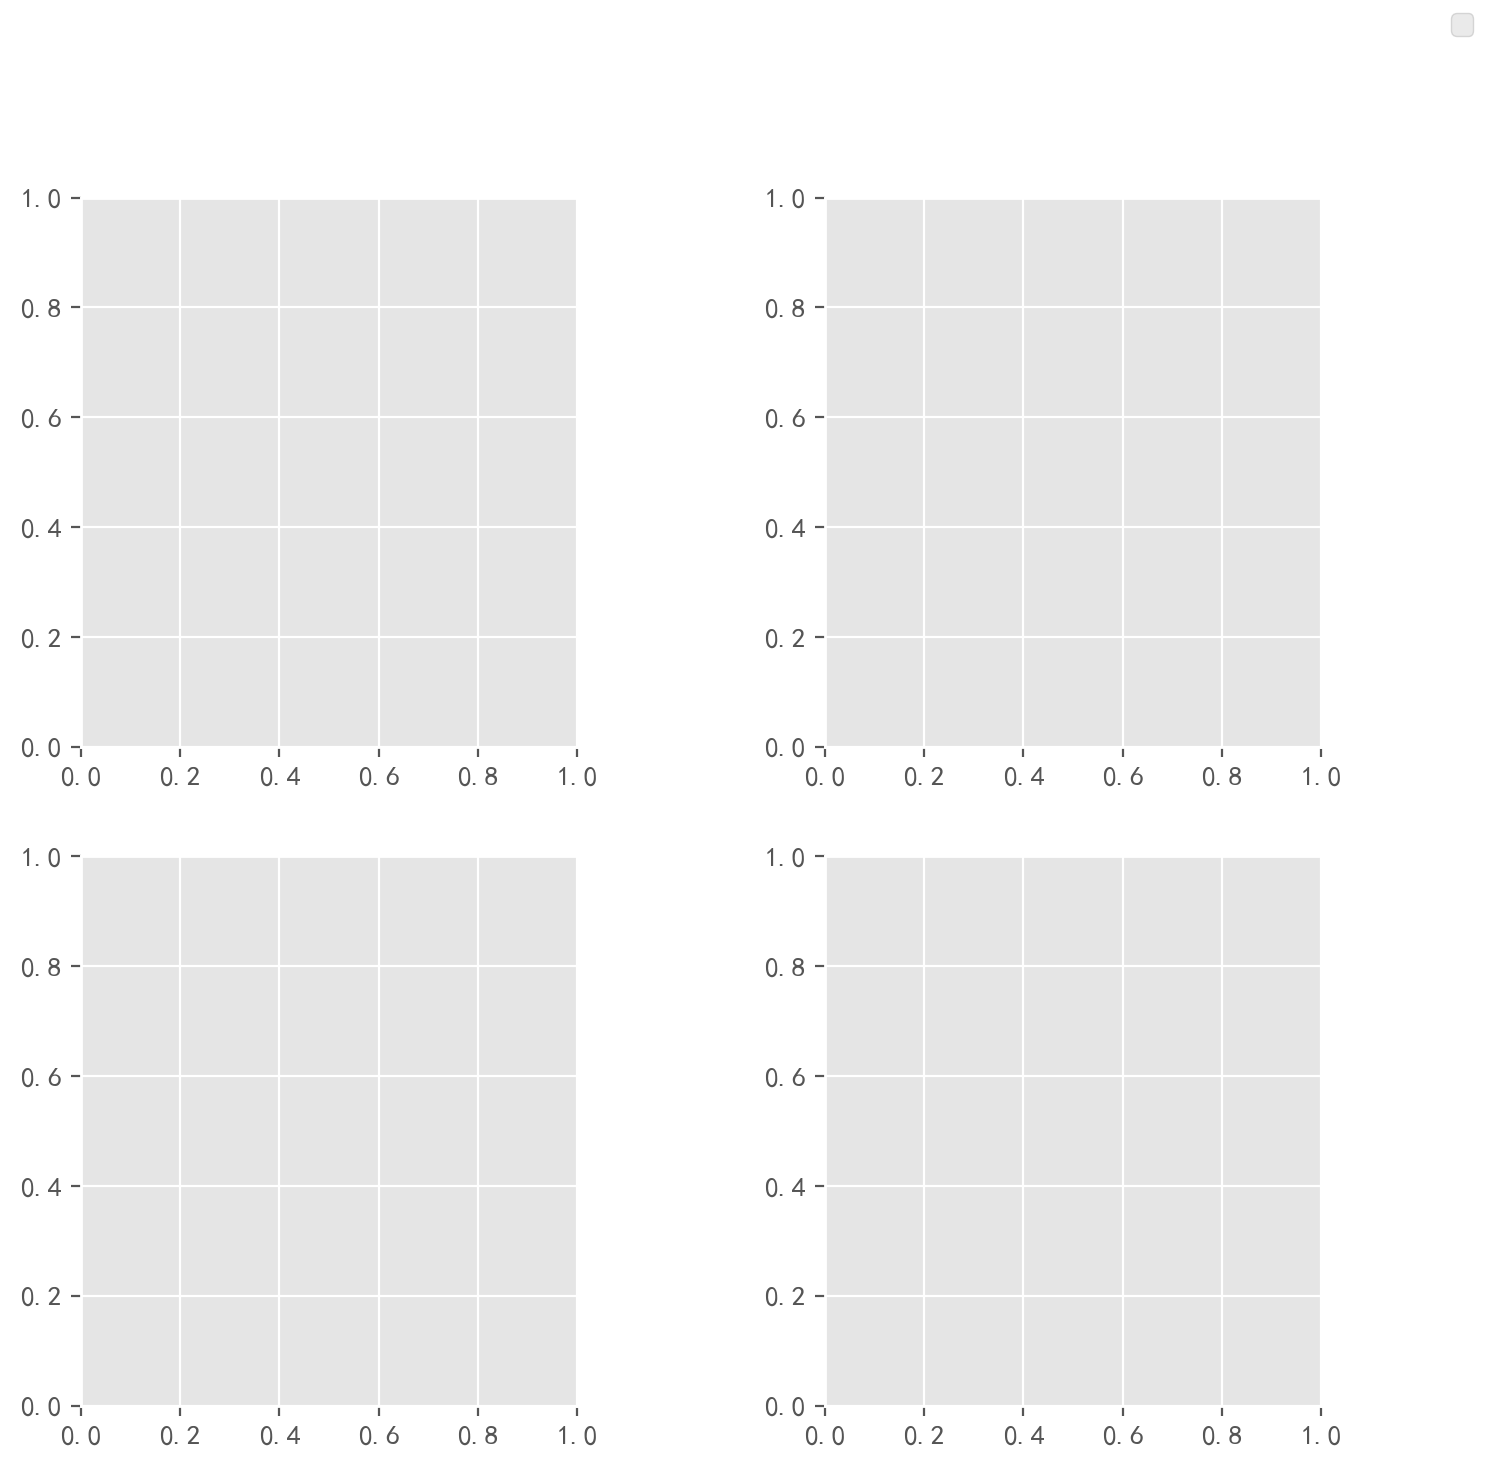

In [12]:
plt.figure(figsize=(8, 9), dpi=500)
fig, axj = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), dpi=200)
axes = axj.flatten()  # 子图展平
i = -4
explode = []

for _ in axes:
    # 这是的ax相当于平时的plt
    #ax.bar
    plt.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=0.5, hspace=0.2)  # 调整子图间距
# 多图公用一个图例    
patches, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(patches, labels, loc='upper right')
plt.show()


## 多图共用一个图例



In [13]:
# 多图公用一个图例
patches, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(patches, labels, loc='upper right')# 图例的位置，bbox_to_anchor=(0.5, 0.92)


# 散点图绘制

In [14]:
x =
y=
plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', c=colors[0])
#plt.title('')
# plt.xticks(x, x_tick, rotation=0)
# plt.legend()
# 添加轴标签
plt.ylabel('Percent of Aus Trade with ASEAN', loc='top')
plt.xlabel('Percent of ASEAN GDP', loc='right')
plt.plot(np.linspace(min(x), max(x), 100),
         np.linspace(min(y), max(y), 100), c='black')
# plt.savefig("./plt样图/scatter2010.png", transparent=True,
# dpi=300, bbox_inches='tight')
#plt.savefig("./plt样图/散点图.png", facecolor='white')
plt.show()


SyntaxError: invalid syntax (Temp/ipykernel_5928/967869573.py, line 1)